In [85]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt

In [98]:
flips = np.array([1,0,0,0,1,0,1,0,1,0,0,0,0])
n_heads = sum(flips)
n_flips = len(flips)
alpha_prior = 1
beta_prior = 1

### Posterior Fn: Prior * Likelihood (doesn't need the denom)

In [88]:
def posterior(proposed_p, n_heads=n_heads, n_flips=n_flips, 
              alpha_prior=alpha_prior, beta_prior=beta_prior):
    likelihood = ss.binom.pmf(n_heads, n_flips, proposed_p) 
    prior = ss.beta.pdf(proposed_p, alpha_prior, beta_prior)
    return prior*likelihood

In [89]:
np.random.seed(42)
samples = []
# current_p = n_heads/n_flips
current_p = 0.5
print(current_p)

0.5


# Metropolis Algo
### Acceptance Criterion: General RV Unif(0,1)
### If U~Unif(0,1) < acceptance probability (posterior_new/posterior_old), accept the step
### Else generate a new step using the PREVIOUS proposal

In [108]:
samples = []
for i in range(10000):
    proposed_p = np.random.normal(current_p, 0.1)
    proposed_p = min(1, max(proposed_p, 0))

    accept_prob = posterior(proposed_p)/posterior(current_p)

    if np.random.rand() < accept_prob:
        current_p = proposed_p
    
    samples.append(current_p)

Text(0, 0.5, 'Probability of Getting Heads Given the Data')

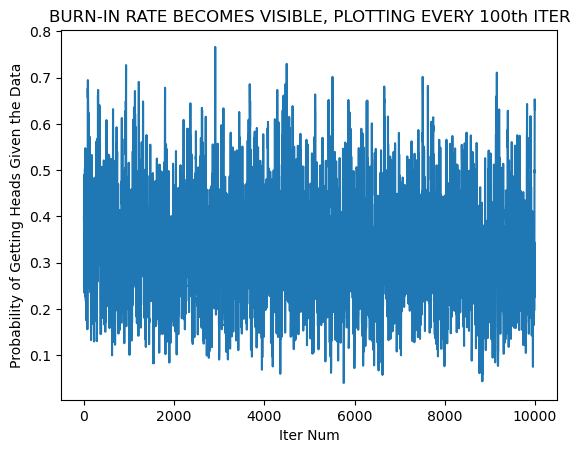

In [112]:

num_samples = len(samples)
samples2 = samples[100::100]
num_samples2 = len(samples2)

# fig,ax = plt.subplot()
plt.plot(list(range(num_samples)), samples)
plt.title("BURN-IN RATE BECOMES VISIBLE, PLOTTING EVERY 100th ITER")
plt.xlabel("Iter Num")
plt.ylabel("Probability of Getting Heads Given the Data")


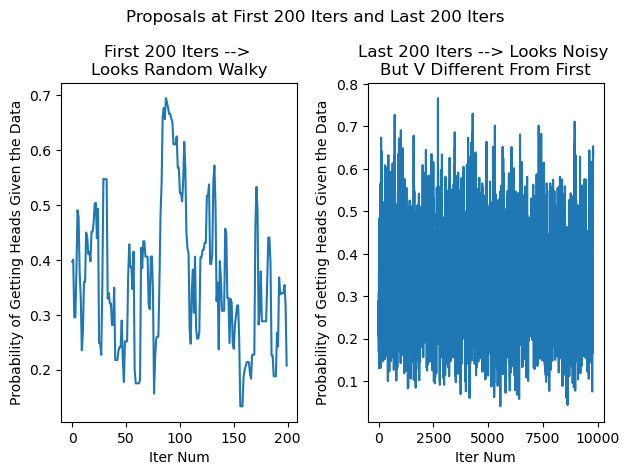

In [113]:
samples3 = samples[:200]
num_samples3 = len(samples3)
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.plot(list(range(num_samples3)), samples3)
ax1.set_title("First 200 Iters --> \nLooks Random Walky")
ax1.set_xlabel("Iter Num")
ax1.set_ylabel("Probability of Getting Heads Given the Data")

samples2b = samples[200:]
num_samples2b = len(samples2b)
ax2.plot(list(range(num_samples2b)), samples2b)
ax2.set_title("Last 200 Iters --> Looks Noisy \nBut V Different From First")
ax2.set_xlabel("Iter Num")
ax2.set_ylabel("Probability of Getting Heads Given the Data")
plt.suptitle("Proposals at First 200 Iters and Last 200 Iters")
plt.tight_layout()

Text(0.5, 0.98, 'Hist of Ps for Metropolis-Hastings')

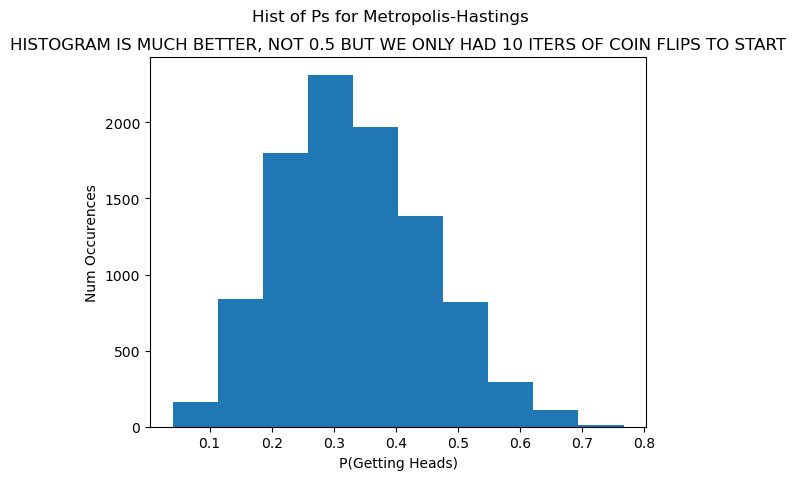

In [110]:
plt.hist(samples[300:])
plt.title("HISTOGRAM IS MUCH BETTER, NOT 0.5 BUT WE ONLY HAD 10 ITERS OF COIN FLIPS TO START")
plt.xlabel("P(Getting Heads)")
plt.ylabel("Num Occurences")
plt.suptitle("Hist of Ps for Metropolis-Hastings")

# Metropolis - Hastings algorithm
## --> introduces a bias to create an assymmetrical distribution
## --> TBH I'm not sure why you would do this.

In [132]:
samples= []

for i in range(100000):
    # Propose a new p with a simple asymmetric mechanism
    if np.random.rand() < 0.7:  # 70% chance to move right
        proposed_p = current_p + np.random.normal(0.02, 0.05)  # Bias towards increasing p
        proposal_ratio = 0.7 / 0.3  # Forward probability / Reverse probability
    else:  # 30% chance to move left
        proposed_p = current_p - np.random.normal(0.02, 0.05)  # Bias towards decreasing p
        proposal_ratio = 0.3 / 0.7  # Adjusted for the reverse move

    proposed_p = min(max(proposed_p, 0), 1)  # Keep within bounds

    # Calculate the acceptance probability including the proposal ratio
    accept_prob = posterior(proposed_p)/posterior(current_p)

    # INCLUDE THE PROPOSAL RATIO IN THE ACCEPTANCE PROBABILITY!! IDK really why
    accept_prob = accept_prob * proposal_ratio
    
    if np.random.rand() < accept_prob:
        current_p = proposed_p
    
    samples.append(current_p)

### These vizzes were generated using 1,000,000 iters 
### but I changed the code to 100,000 in case you tried to rerun it.

Text(0, 0.5, 'Probability of Getting Heads Given the Data')

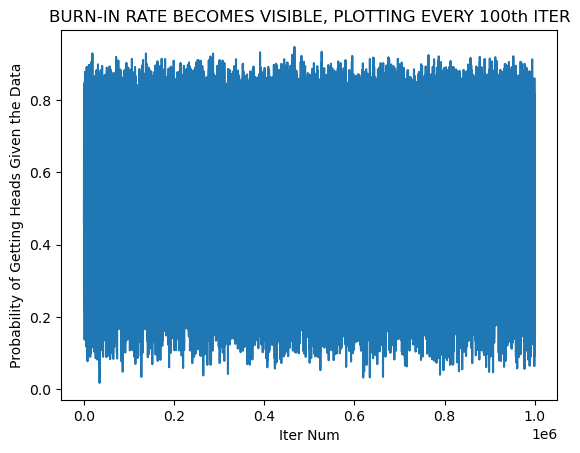

In [133]:
num_samples = len(samples)
samples2 = samples[100::100]
num_samples2 = len(samples2)

# fig,ax = plt.subplot()
plt.plot(list(range(num_samples)), samples)
plt.title("BURN-IN RATE BECOMES VISIBLE, PLOTTING EVERY 100th ITER")
plt.xlabel("Iter Num")
plt.ylabel("Probability of Getting Heads Given the Data")


Text(0.5, 0.98, 'Hist of Ps for Metropolis-Hastings')

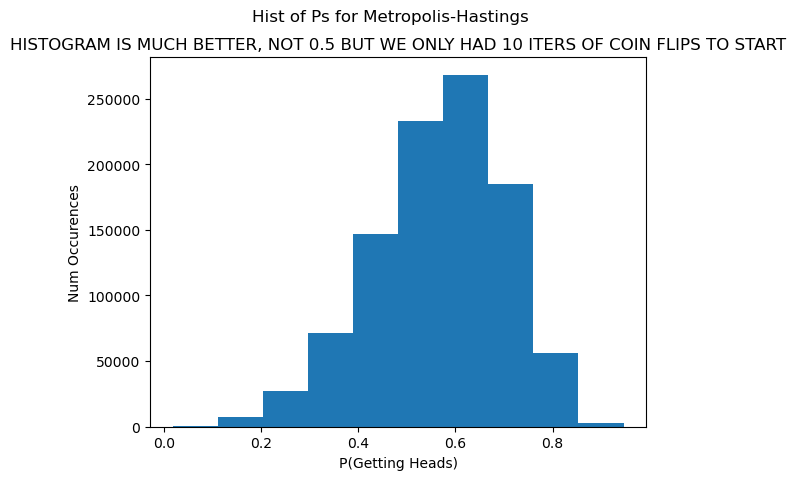

In [134]:
plt.hist(samples[300:])
plt.title("HISTOGRAM IS MUCH BETTER, NOT 0.5 BUT WE ONLY HAD 10 ITERS OF COIN FLIPS TO START")
plt.xlabel("P(Getting Heads)")
plt.ylabel("Num Occurences")
plt.suptitle("Hist of Ps for Metropolis-Hastings")

In [136]:
np.mean(samples)


0.5667522091061166